In [3]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 112.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import requests
import es_core_news_sm

In [5]:
nlp = es_core_news_sm.load()

In [15]:
# No usar el directo, sino el RAW. Este es el directo url_text = 'https://github.com/jcmachicaocuf/codigos_CUF_LLM_NLP/blob/main/U1_Foro1_quijote_cap1.txt'
url_text = 'https://raw.githubusercontent.com/jcmachicaocuf/codigos_CUF_LLM_NLP/main/U1_Foro1_quijote_cap1.txt'
response = requests.get(url_text)
texto = response.text

In [16]:
doc = nlp(texto)

In [ ]:
# Alternativamente se puede usar este código si el archivo está en Drive
file_path = 'drive/My Drive/00 data/U1_Foro1_quijote_cap1.txt'
texto = read_text_from_file(file_path)

In [38]:
G = nx.DiGraph()

In [55]:
def get_adjacent_subjects_and_verbs(sent):
    subjects_and_verbs = []
    for token in sent:
        if token.dep_ in ('nsubj', 'nsubj_pass', 'csubj', 'csubj_pass') or token.pos_ == "VERB" or token.dep_ in ('ROOT', 'aux', 'auxpass', 'ccomp', 'xcomp', 'advcl', 'relcl'):
            subjects_and_verbs.append(token)
    # Find adjacent subjects and verbs
    edges = []
    for i in range(len(subjects_and_verbs) - 1):
      edges.append((subjects_and_verbs[i].text, subjects_and_verbs[i+1].text))
    return edges

In [56]:
for k,sent in enumerate(doc.sents):
  print(k, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [57]:
k_lim=20

In [58]:
print('conteo: ')

for k,sent in enumerate(doc.sents):
  if k<k_lim:
    print(k, end=' ')
    edges = get_adjacent_subjects_and_verbs(sent)
    for edge in edges:
      G.add_edge(*edge)
  else:
    pass

conteo: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

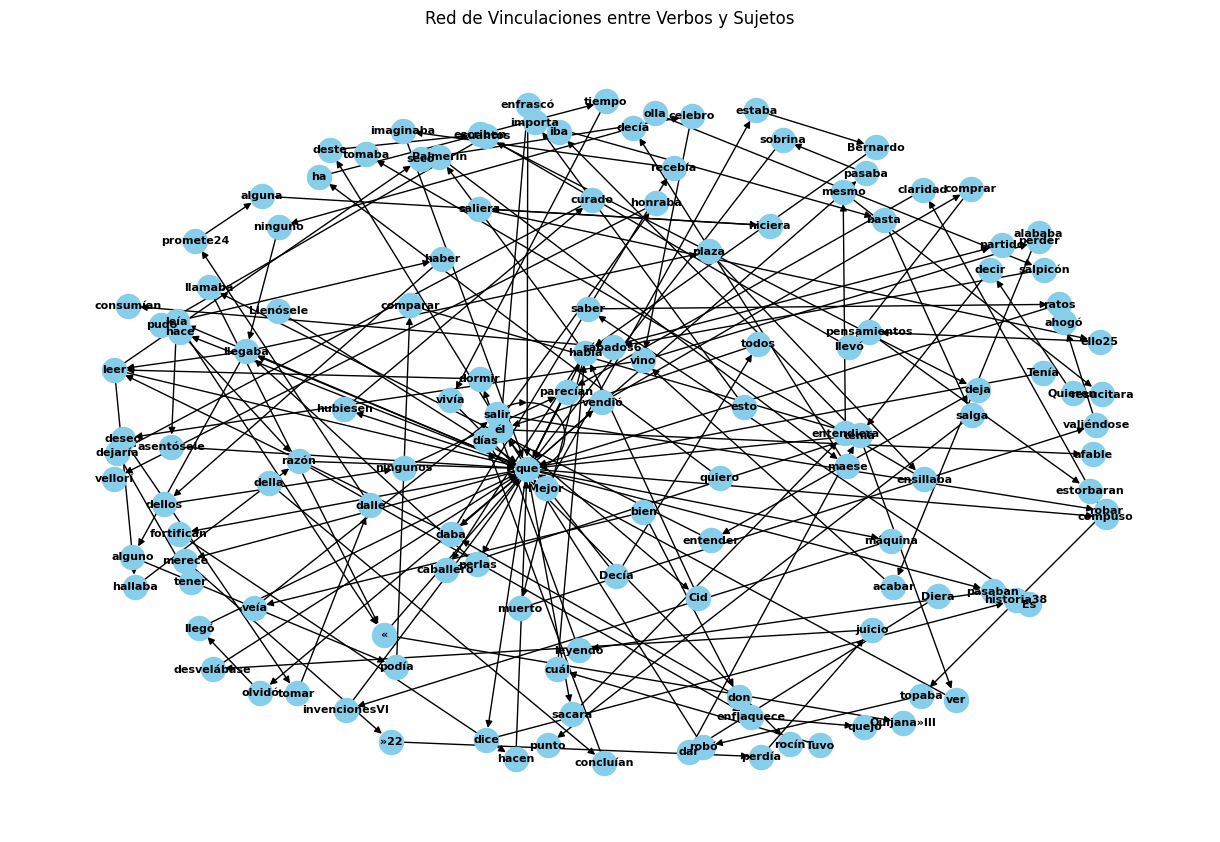

In [62]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.7)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_weight='bold', arrows=True)
plt.title('Red de Vinculaciones entre Verbos y Sujetos')
plt.show()